### PCA로 차원 축소 후 Catboost 분류 시각화 하기

In [1]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,  LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

data = pd.read_excel("../datasets/DB_0531_1740(태환).xlsx")

data.fillna(0, inplace=True)
column_list=['유동비율', '부채비율',  'new_시총', '영업이익률', 'ROA', 
       '총자산회전율',  '매출액증가율',  '총자산증가율','new_평균근속연수' 
,'new_기업존속연수', '비정규직비율', '여성고용률', "자산/기말인원"]

x = data[column_list]
st = StandardScaler()
x= st.fit_transform(x)
x=pd.DataFrame(x, columns=column_list)
# df_17_20 = x[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
# df_21 = x[data['회계년도'] == 2021] #validate
# y = data['K1_Score_ad']
# y = y.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
# y_17_20=y[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
# y_21 = y[data['회계년도'] == 2021] #validate
# X_train=df_17_20
# X_test=df_21
# y_train=y_17_20
# y_test =y_21


df_17_20 = x[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
df_21 = x[data['회계년도'] == 2021] #validate
y = data['K1_Score_ad']
y = y.apply(lambda x: 1 if(x=="부실" or x=="판정보류") else 0)
y_17_20=y[data['회계년도'].isin([2017,2018,2019,2020])] #train/test
y_21 = y[data['회계년도'] == 2021] #validate
X_train=df_17_20
X_test=df_21
y_train=y_17_20
y_test =y_21


pca_X_train=X_train
from sklearn.decomposition import PCA
pca = PCA(n_components=pca_X_train.shape[1])
pca_array = pca.fit_transform(pca_X_train)
pca_std_X_train = pd.DataFrame(pca_array, index=pca_X_train.index,
                      columns=[f"pca{num+1}" for num in range(pca_X_train.shape[1])])
# pca_std_X_train

pca_X_test=X_test
from sklearn.decomposition import PCA
pca = PCA(n_components=pca_X_test.shape[1])
pca_array = pca.fit_transform(pca_X_test)
pca_std_X_test = pd.DataFrame(pca_array, index=pca_X_test.index,
                      columns=[f"pca{num+1}" for num in range(pca_X_test.shape[1])])
# pca_std_X_test

# 언더샘플링
pca_std_X_train_samp, y_train_samp = CondensedNearestNeighbour(random_state=0).fit_resample(pca_std_X_train, y_train)


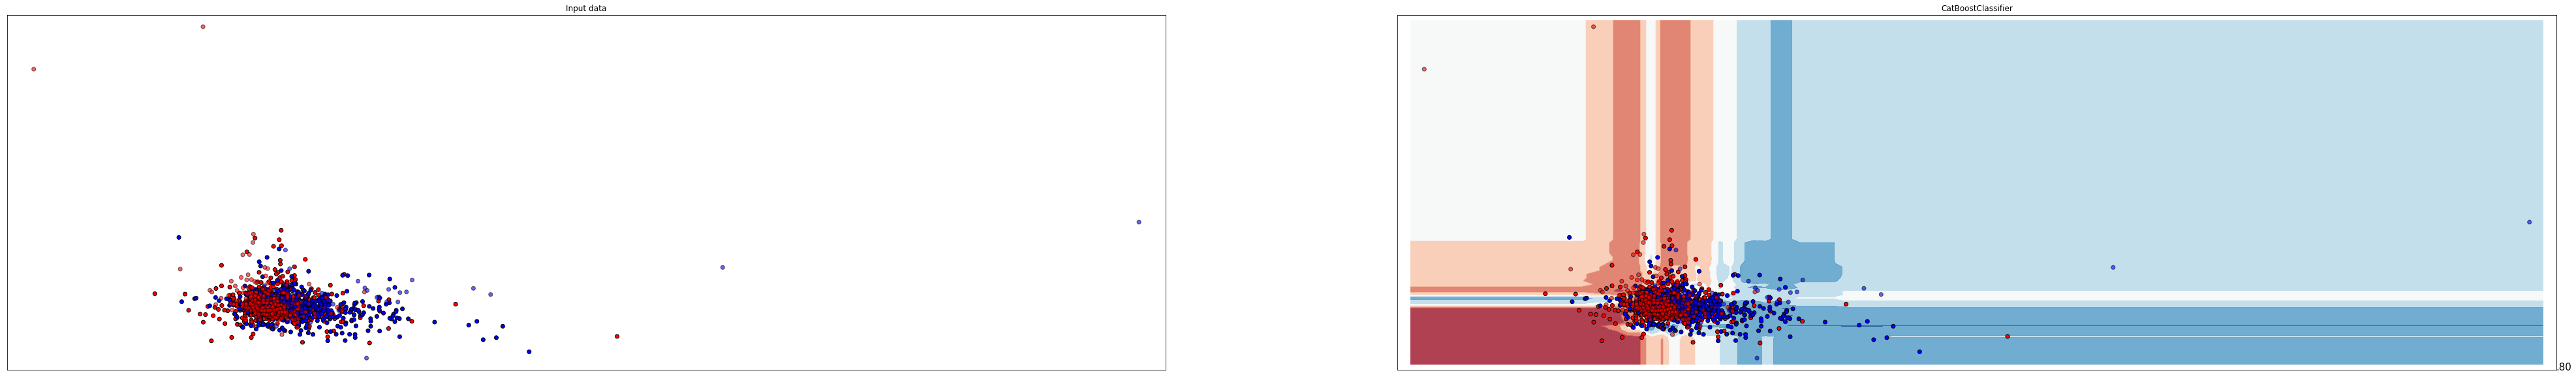

In [29]:
X_train_samps=pca_std_X_train_samp.iloc[:,:2]
X_tests=pca_std_X_test.iloc[:,:2]
values_train_x = X_train_samps.values
values_train_y= y_train_samp.values
values_test_x= X_tests.values
values_test_y = y_test.values
# x_values=x.values
# y_values = y.values
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris


X =  pd.concat([pca_std_X_train_samp, pca_std_X_test], axis = 0)
X.reset_index(drop=True, inplace=True)# we only take the first two features. We could
# X=X.iloc[:, :2].values
X=X.values
Y = pd.concat([y_train_samp,y_test], axis=0)
Y.reset_index(drop=True, inplace=True)
Y=Y.values
linearly_separable = (X, y)
dataset = [ linearly_separable
   
]

# X = StandardScaler().fit_transform(X)
# values_train_x, values_test_x, values_train_y, values_test_y = train_test_split(
#         X, y, test_size=0.4, random_state=42
#     )

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression,  LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from catboost import CatBoostClassifier

names = ["CatBoostClassifier",
    
]

classifiers = [
    CatBoostClassifier(iterations=600,
          depth=4,
          loss_function= 'MultiClass',
          leaf_estimation_iterations=10,
           eval_metric='Accuracy',
          logging_level='Silent')]
    


figure = plt.figure(figsize=(70, 10))
i = 1
# iterate over dataset
for ds_cnt, ds in enumerate(dataset):
    # preprocess dataset, split into training and test part
    X, y = ds
    # X = StandardScaler().fit_transform(X)
    # values_train_x, values_test_x, values_train_y, values_test_y = train_test_split(
    #     X, y, test_size=0.4, random_state=42
    # )

    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    y_min, y_max = X[:, 1].min()-1  , X[:, 1].max()+1
    # x_min, x_max = 0,1   
    # y_min, y_max =0,1

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(dataset), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(values_train_x[:, 0], values_train_x[:, 1], c=values_train_y, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        values_test_x[:, 0], values_test_x[:, 1], c=values_test_y, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(dataset), len(classifiers) + 1, i)
        clf.fit(values_train_x, values_train_y)
        score = clf.score(values_test_x, values_test_y)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            values_train_x[:, 0], values_train_x[:, 1], c=values_train_y, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            values_test_x[:, 0],
            values_test_x[:, 1],
            c=values_test_y,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max,
            y_min,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="left",
        )
        i += 1


### Train 데이터 scatter plot

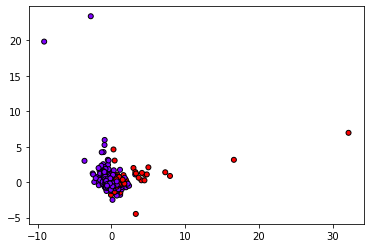

In [32]:
plt.scatter(values_test_x[:, 0], values_test_x[:, 1], marker='o', c=values_test_y, s=25, edgecolor = 'k', cmap='rainbow')

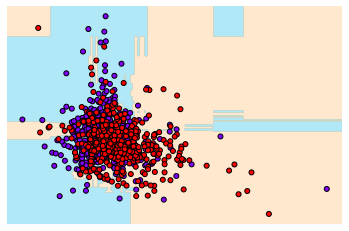

In [37]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
    
   
cat = CatBoostClassifier(iterations=600,
          depth=4,
          loss_function= 'CrossEntropy',
          leaf_estimation_iterations=10,
           eval_metric='Accuracy',
          logging_level='Silent').fit(values_train_x, values_train_y)
visualize_boundary(cat, values_train_x, values_train_y)